In [1]:
theta = 3.89 # degrees
er = 12
a  = 100e-9
r  = 0.4
d  = 0.55 * a
di = 1.35 * a

In [2]:
import numpy as np
N = 256
eps = np.ones((N, N))*er
x = np.linspace(-0.5, 0.5, N)
y = np.linspace(-0.5, 0.5, N)
X, Y = np.meshgrid(x, y)
eps[np.sqrt(X**2+Y**2)< r] = 1.0

In [30]:
import sys
sys.path.append("..")
from khepri.alternative import scattering_layer, incident, Lattice
from khepri.tools import c
from math import pi
from cmath import sqrt as csqrt
from numpy.linalg import inv
from tqdm import tqdm
from khepri.alternative import scattering_layer, incident, Lattice,redheffer_product

freqsn = np.linspace(0.49, 0.59, 200)
TTTs = list()
for hi in [1.35,1.1,0.95,0.85,0.75,0.65,0.55]:
    di = a * hi
    TTs = list()
    for fn in tqdm(freqsn):
        #fn = 0.8
        f = fn * c / a
        wavelength = c / f
        pw = (9,9)
        l = Lattice(pw, a, wavelength, kp=(0,0))
        S = scattering_layer(l, eps, wavelength, a=a, depth=d)
        Si = scattering_layer(l, np.ones_like(eps), wavelength, a=a, depth=di)
        Stot = redheffer_product(S, redheffer_product(Si, S))
        epsi=1
        kp = (0,0)
        k0 = 2*pi/wavelength
        kzi = np.conj(csqrt(k0**2*epsi-kp[0]**2-kp[1]**2))
        esrc = incident(pw, 1, 0, kp=(kp[0], kp[1], kzi))
        S21 = Stot[1,0]
        etm  = l.W0 @  S21 @ inv(l.W0) @ esrc
        tx, ty = np.split(etm, 2)
        tz = - inv(l.KZ) @ (l.KX@tx+l.KY@ty)
        t = l.KZ.real @ (np.abs(tx)**2+np.abs(ty)**2+np.abs(tz)**2)
        TT = np.sum(t)
        TTs.append(TT) 
    TTTs.append(TTs)

100%|██████████| 200/200 [00:47<00:00,  4.18it/s]


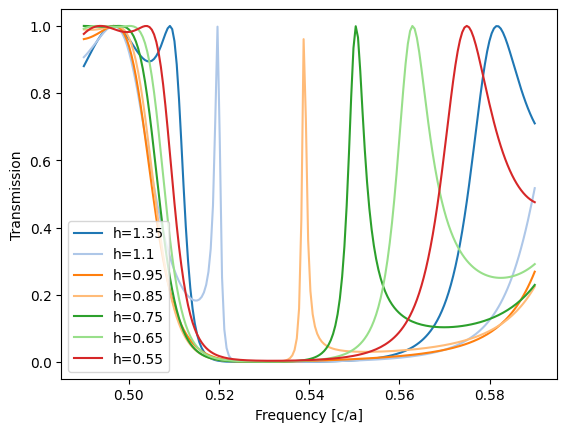

In [51]:
import matplotlib.pyplot as plt
#data = np.load("trans.npy", allow_pickle=True)
cmap = iter(plt.cm.tab20(np.arange(10)))
colors = iter(["darkred", "orangered", "orange", "gold", "limegreen", "forestgreen", "cadetblue", "royalblue"])
for TT, hi in zip(TTTs, [1.35,1.1,0.95,0.85,0.75,0.65,0.55]):
    plt.plot(freqsn, TT, c=next(cmap), label=f"h={hi}")
#plt.plot(np.linspace(0.7, 0.84, 201), data[:, 0, 2])
plt.xlabel("Frequency [c/a]")
plt.ylabel("Transmission")
plt.legend(loc="lower left")
plt.savefig("Spectrum.svg")

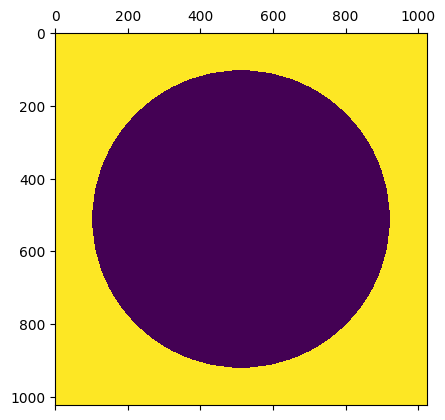

In [4]:
import numpy as np
import matplotlib.pyplot as plt
N = 1024
eps = np.ones((N, N))*er
x = np.linspace(-0.5, 0.5, N)
y = np.linspace(-0.5, 0.5, N)
X, Y = np.meshgrid(x, y)
eps[np.sqrt(X**2+Y**2)< r] = 1.0
plt.matshow(eps)


[11.04536102  0.        ] [5.52268051 5.52268051]


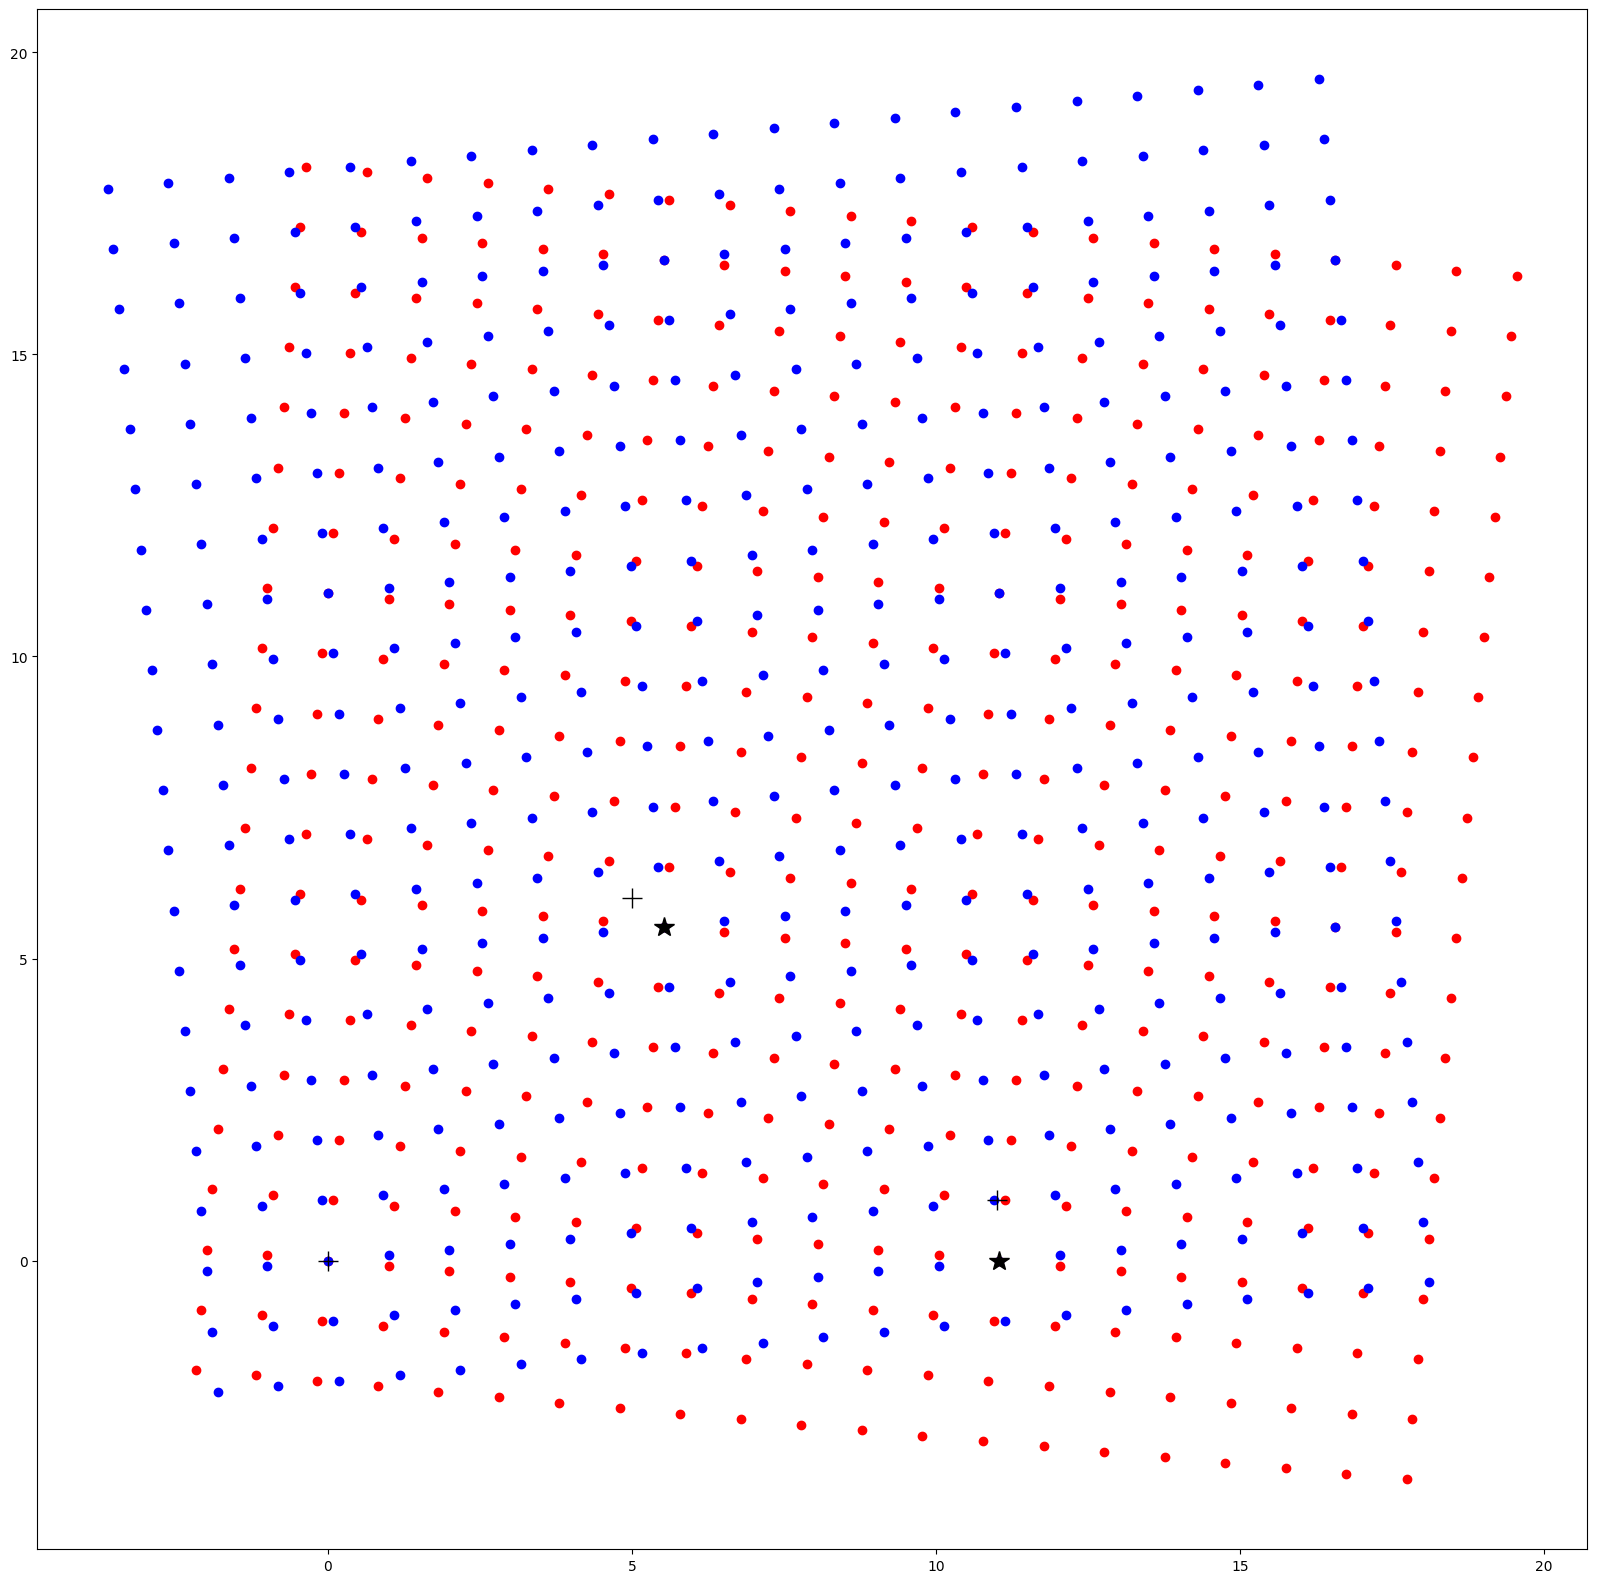

In [5]:
import sys
sys.path.append("..")
from khepri.tools import rotation_matrix
theta = 10.389
R = rotation_matrix(np.deg2rad(theta))
x = np.arange(21)
X, Y = np.meshgrid(x-2,x-2)
xy  = np.vstack((X.flat, Y.flat))
xyR = R @ xy

common = xyR
alpha = -np.arctan(1.0/11.)
R2 = rotation_matrix(alpha)
xy = R2 @ xy
xyR = R2 @ xyR

fig, ax = plt.subplots(figsize=(20,20))
plt.scatter(*xy, color='r')
plt.scatter(*xyR, color='b')
plt.plot(5,6,'k+', markersize=15)
plt.plot(0,0,'k+', markersize=15)
plt.plot(11,1,'k+', markersize=15)
B1 = (R2 @ [11, 1])
B2 = (R2 @ [5, 6])
plt.plot(*B1,'k*', markersize=15)
plt.plot(*B2,'k*', markersize=15)
print(B1, B2)

#plt.axis([4.99,5.01,5.99,6.01])
#plt.axis([0,5,0,6])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
r = 0.25
er = 4
d = 0.2*a
N = 512
eps = np.ones((N, N))*er
epsr = np.ones((N, N))*er
x = np.linspace(0, B1[0], N, endpoint=True)
y = np.linspace(0, 2*B2[1], N, endpoint=True)
X, Y = np.meshgrid(x, y)
for xi, yi in xy.T:
    eps[np.sqrt((X-xi)**2+(Y-yi)**2)<= r] = 1.0
for xi, yi in xyR.T:
    epsr[np.sqrt((X-xi)**2+(Y-yi)**2)<= r] = 1.0
    

(-0.5, 511.5, -0.5, 511.5)

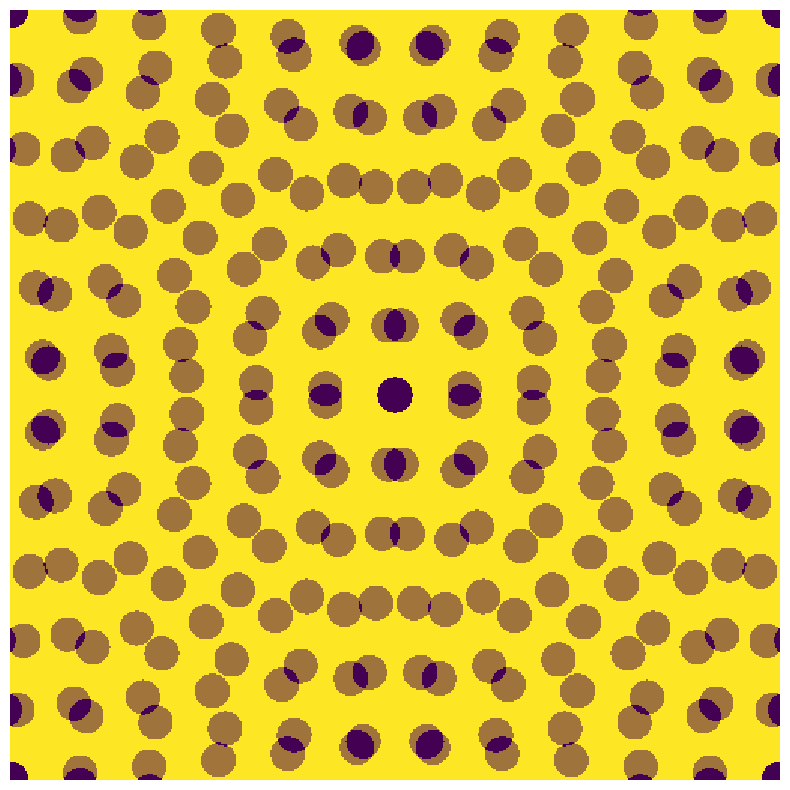

In [13]:
from numpy.matlib import repmat
fig, ax = plt.subplots(figsize=(10,10))
repeat= 1
ax.matshow(repmat(eps, repeat,repeat))
ax.matshow(repmat(epsr, repeat, repeat), alpha=0.5, origin="lower")
ax.axis("off")
#plt.scatter(N*xyR[0,:]/10, N*xyR[1,:]/6, color='k', marker="+", s=100)
#plt.axis([0,2*N,0,N])


In [10]:
from khepri.alternative import scattering_layer, incident, Lattice,redheffer_product
from khepri.tools import c
from math import pi
from cmath import sqrt as csqrt
from numpy.linalg import inv
from tqdm import tqdm
freqsn = np.linspace(0.7, 0.84, 60)
TTs = list()
for fn in tqdm(freqsn):
    f = fn * c / a / B1[0]
    wavelength = c / f
    pw = (15,15)
    l = Lattice(pw, a, wavelength, kp=(0,0))
    S1 = scattering_layer(l, eps,  depth=d)
    S2 = scattering_layer(l, epsr, depth=d)
    S = redheffer_product(S1,S2)
    epsi=1
    kp = (0,0)
    k0 = 2*pi/wavelength
    kzi = np.conj(csqrt(k0**2*epsi-kp[0]**2-kp[1]**2))
    esrc = incident(pw, 1, 1, kp=(kp[0], kp[1], kzi))
    S21 = S[1,0]
    etm  = l.W0 @  S21 @ inv(l.W0) @ esrc
    tx, ty = np.split(etm, 2)
    tz = - inv(l.KZ) @ (l.KX@tx+l.KY@ty)
    t = l.KZ.real @ (np.abs(tx)**2+np.abs(ty)**2+np.abs(tz)**2)
    TT = np.sum(t)
    TTs.append(TT) 

100%|██████████| 60/60 [02:08<00:00,  2.14s/it]


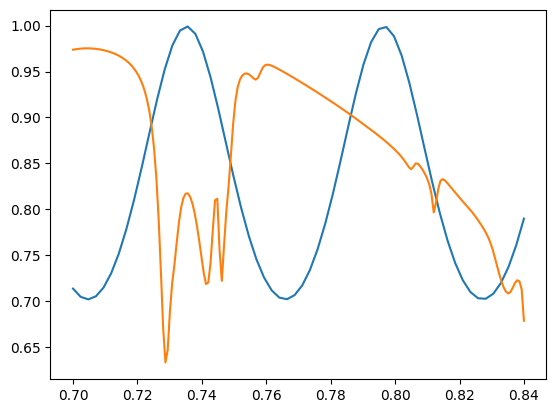

In [11]:
import matplotlib.pyplot as plt
data = np.load("../trans.npy", allow_pickle=True)
plt.plot(freqsn, TTs)
plt.plot(np.linspace(0.7, 0.84, 201), data[:, 20, 2])

In [290]:
print(B1)
print(B2[1]*2)

[11.04536102  0.        ]
11.045361017187261


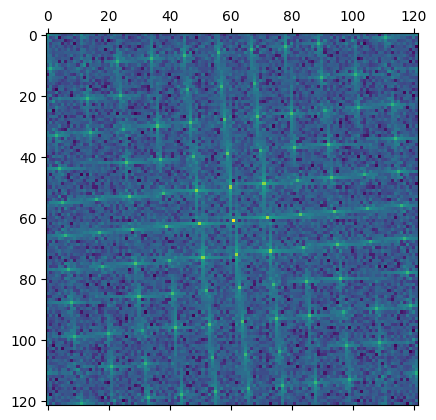

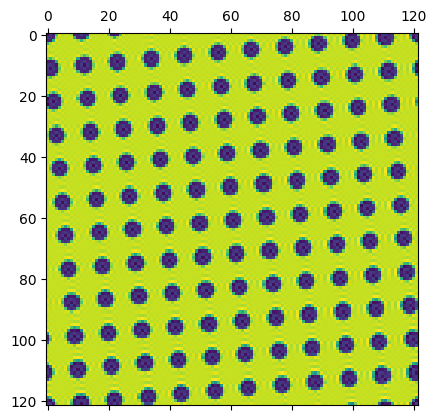

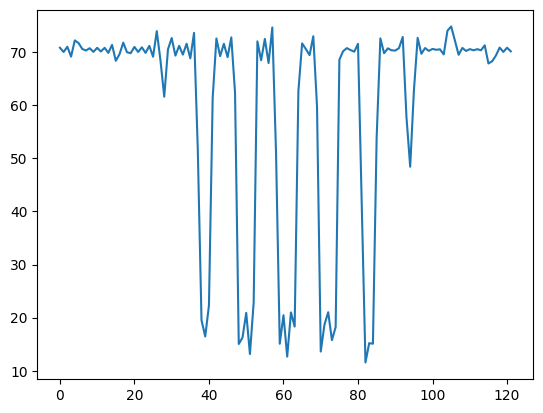

In [20]:
ffr = 61
ff1  = np.fft.fftshift(np.fft.fft2(eps))[N//2-ffr:N//2+ffr, N//2-ffr:N//2+ffr]
plt.matshow(np.log1p(np.abs(ff1)))
plt.matshow(np.abs(np.fft.ifft2(ff1)))
plt.figure()
plt.plot(np.abs(np.fft.ifft2(ff1))[:, ff1.shape[0]//2])